<a href="https://colab.research.google.com/github/olcaykursun/ML/blob/main/Fall2025/Week13/word_embeddings_and_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install Gensim: a library for working with pretrained word embeddings like Word2Vec and FastText.
!pip install gensim

# These models convert words into high-dimensional vectors that capture semantic relationships.
# They're trained on large corpora to learn how words co-occur in context.


# --- Word2Vec: Google News (300 dimensions) ---
# ~100 billion words, ~3 million unique words/phrases
# Uncomment to load (large: ~3GB, requires internet):
# from gensim.downloader import load
# w2v = load('word2vec-google-news-300')


# --- FastText: Wiki News + Common Crawl (300 dimensions) ---
# ~16 million documents, ~600 billion tokens, ~1 million words
# Supports out-of-vocabulary words using subword information
# Uncomment to load (smaller: ~1GB, requires internet):
# from gensim.downloader import load
# ft = load('fasttext-wiki-news-subwords-300')



# For something more interactive on word embeddings, you can visit https://projector.tensorflow.org/


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 30.2 MB/s eta 0:00:00


In [ ]:
# Load pre-trained FastText model
from gensim.downloader import load
wv = load('fasttext-wiki-news-subwords-300')

[==================================================] 100.0% 958.5/958.4MB downloaded


In [ ]:
wv['king'].shape   #every word turns into 300 dimensional vector

(300,)

In [ ]:
wv['king']          #Vectors point in similar directions if the words cooccur/relate to one another

array([-1.2063e-01,  5.1695e-03, -1.2447e-02, -7.8528e-03, -2.3738e-02,
       -8.2595e-02,  4.5790e-02, -1.5382e-01,  6.4550e-02,  1.2893e-01,
        2.7643e-02,  1.5958e-02,  7.7559e-02,  6.0516e-02,  1.2737e-01,
        8.4766e-02,  6.3890e-02, -1.7687e-01,  4.3017e-02, -1.8031e-02,
       -3.3041e-02,  2.1930e-02, -1.1328e-02,  6.6453e-02,  1.5826e-01,
       -2.3008e-02, -4.3616e-03, -2.2379e-02,  4.4891e-02,  3.0103e-03,
       -1.5565e-02, -7.6785e-02, -9.2186e-02,  5.7907e-02, -2.7658e-02,
        5.4500e-03,  1.8975e-02,  4.2939e-02,  3.4704e-03,  4.0449e-02,
       -4.0245e-03, -1.1594e-01, -5.8337e-03,  3.2509e-02, -8.6535e-02,
        7.2000e-02, -2.2299e-02,  1.3079e-02, -3.9515e-02,  6.8996e-02,
        9.2300e-02, -7.5371e-02,  5.9412e-03, -3.4945e-02, -3.3417e-02,
       -9.9982e-02,  1.6438e-02,  6.3739e-02, -6.2391e-02,  7.8285e-04,
       -2.9210e-02, -9.6416e-02,  7.2910e-02,  4.5905e-02, -8.3387e-02,
        7.1969e-02,  4.0932e-02, -5.6454e-03,  1.3709e-01, -1.17

In [ ]:
# Built-in similarity (cosine-based)
how_similar = wv.similarity('king', 'queen')
print(how_similar)

not_so_similar = wv.similarity('king', 'basketball')
print(not_so_similar)


0.7704246
0.36478716


In [ ]:
import numpy as np       #dot(x, y) = |x| * |y| * cos(alpha)
cosine_alpha = np.dot(wv['king'], wv['queen']) / np.sqrt(np.dot(wv['king'], wv['king']) * np.dot(wv['queen'], wv['queen']))
print(cosine_alpha)      #sometimes we want cosine distance, in that case we simply subtract from 1: cosine_distance = 1 - cosine_alpha

0.77042454


In [ ]:
wv.key_to_index['king']   #every word has an index (ID) number

2407

In [ ]:
wv.index_to_key[15200]    #we can turn words into indices and from indices back to words

'starvation'

In [ ]:
wv.most_similar(positive=['dogs','cat'], negative=['dog'])

[('cats', 0.9430419206619263),
 ('felines', 0.7601239085197449),
 ('housecats', 0.7563892006874084),
 ('kittens', 0.7071666121482849),
 ('tomcats', 0.7030109167098999),
 ('moggies', 0.6991898417472839),
 ('kitties', 0.6986546516418457),
 ('sub-cats', 0.6973353624343872),
 ('supercats', 0.6972814798355103),
 ('cats.', 0.6946355700492859)]

In [ ]:
wv.most_similar(positive=['king','woman'], negative=['man'])   #king - man + woman = ?

[('queen', 0.7786749005317688),
 ('queen-mother', 0.7143871784210205),
 ('king-', 0.6981282234191895),
 ('queen-consort', 0.6724597811698914),
 ('monarch', 0.6666999459266663),
 ('child-king', 0.6663159132003784),
 ('boy-king', 0.6605346202850342),
 ('princess', 0.653827428817749),
 ('ex-queen', 0.652145504951477),
 ('kings', 0.6497675180435181)]

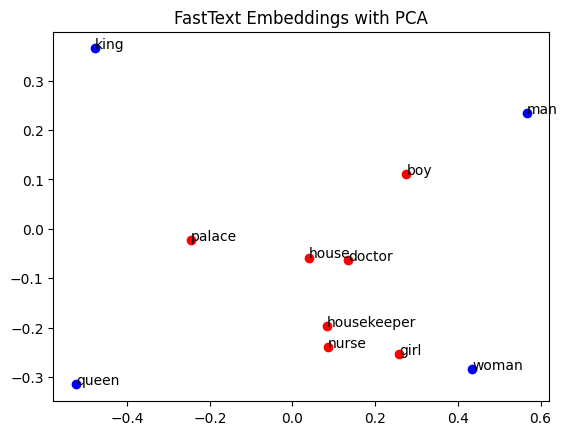

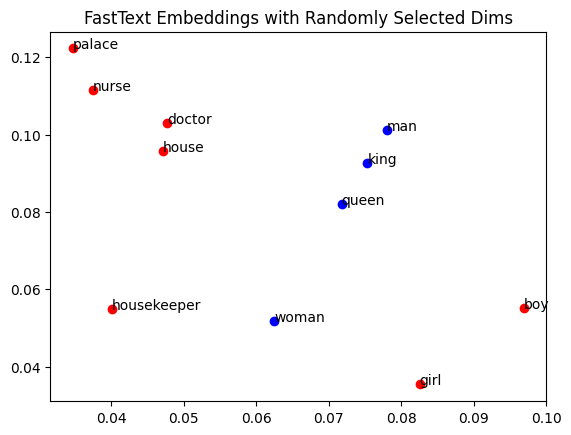

In [ ]:
# FastText Embedding Visualization with PCA
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt


# Word lists
train_words = ['king', 'man', 'woman', 'queen']
test_words = ['nurse', 'doctor', 'housekeeper', 'girl', 'boy', 'palace', 'house']
all_words = train_words + test_words

# Embedding matrix
train_matrix = np.array([wv[word] for word in train_words], dtype=np.float32)
test_matrix = np.array([wv[word] for word in test_words], dtype=np.float32)

# --- PCA and Plotting ---
def plot_embeddings_pca(train_matrix, test_matrix, title):
    pca = PCA(n_components=2).fit(train_matrix)
    combined = np.concatenate([train_matrix, test_matrix], axis=0)
    reduced = pca.transform(combined)
    plt.figure()
    plt.title(title)
    for i, word in enumerate(all_words):
        color = 'blue' if word in train_words else 'red'
        plt.scatter(reduced[i, 0], reduced[i, 1], c=color)
        plt.annotate(word, (reduced[i, 0], reduced[i, 1]))
    plt.show()
    return pca

# --- Plot using two of the original dimensions ---
def plot_embeddings_random(train_matrix, test_matrix, title):
    dim0, dim1 = np.random.choice(train_matrix.shape[1], size=2, replace=False)
    combined = np.concatenate([train_matrix, test_matrix], axis=0)
    plt.figure()
    plt.title(title)
    for i, word in enumerate(all_words):
        color = 'blue' if word in train_words else 'red'
        plt.scatter(combined[i, dim0], combined[i, dim1], c=color)
        plt.annotate(word, (combined[i, dim0], combined[i, dim1]))
    plt.show()

pca = plot_embeddings_pca(train_matrix, test_matrix, "FastText Embeddings with PCA")
plot_embeddings_random(train_matrix, test_matrix, "FastText Embeddings with Randomly Selected Dims")

In [ ]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())


[0.66022146 0.2398173 ]
0.9000388


In [ ]:
pca.components_.shape

(2, 300)

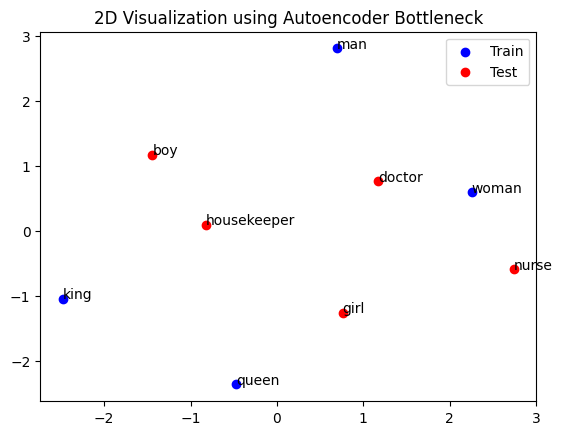

In [ ]:
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler

# Word lists
train_words = ['king', 'man', 'woman', 'queen']
test_words = ['nurse', 'doctor', 'housekeeper', 'girl', 'boy']
all_words = train_words + test_words

# Embedding matrix
train_matrix = np.array([wv[word] for word in train_words])
test_matrix = np.array([wv[word] for word in test_words])

scaler = StandardScaler()
train_matrix = scaler.fit_transform(train_matrix)
test_matrix  = scaler.transform(test_matrix)   # use the same scaler!

train_embeddings = torch.tensor(train_matrix)
test_embeddings = torch.tensor(test_matrix)

# Autoencoder definition
class Autoencoder(nn.Module):
    def __init__(self, input_dim=300, bottleneck_dim=2):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, bottleneck_dim, bias=False)
        )
        self.decoder = nn.Sequential(
            nn.Linear(bottleneck_dim, input_dim, bias=False)
        )

    def forward(self, x):
        z = self.encoder(x)
        x_recon = self.decoder(z)
        return x_recon

# Initialize and train
model = Autoencoder()
optimizer = torch.optim.Adam(model.parameters())
criterion = nn.MSELoss()

# Train only on the train_embeddings
for epoch in range(1000):
    model.train()
    optimizer.zero_grad()
    output = model(train_embeddings)
    loss = criterion(output, train_embeddings)
    loss.backward()
    optimizer.step()

# Get 2D bottleneck outputs
model.eval()
with torch.no_grad():
    train_2d = model.encoder(train_embeddings).numpy()
    test_2d = model.encoder(test_embeddings).numpy()

# Visualization
plt.scatter(train_2d[:, 0], train_2d[:, 1], color='blue', label='Train')
for i, word in enumerate(train_words):
    plt.annotate(word, (train_2d[i, 0], train_2d[i, 1]))

plt.scatter(test_2d[:, 0], test_2d[:, 1], color='red', label='Test')
for i, word in enumerate(test_words):
    plt.annotate(word, (test_2d[i, 0], test_2d[i, 1]))

plt.legend()
plt.title("2D Visualization using Autoencoder Bottleneck")
plt.show()

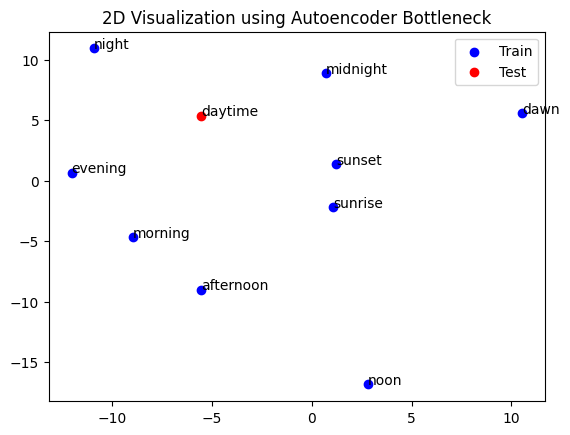

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# ----------------------------
# 1. Word lists and embeddings
# ----------------------------
train_words = [
    "midnight", "dawn", "sunrise", "morning", "noon",
    "afternoon", "evening", "sunset", "night"
]
test_words = ["daytime"]

all_words = train_words + test_words

train_matrix = np.array([wv[w] for w in train_words])
test_matrix  = np.array([wv[w] for w in test_words])

# Standardize
scaler = StandardScaler()
train_matrix = scaler.fit_transform(train_matrix)
test_matrix  = scaler.transform(test_matrix)

train_embeddings = torch.tensor(train_matrix, dtype=torch.float32)
test_embeddings  = torch.tensor(test_matrix, dtype=torch.float32)

# ----------------------------
# 2. Autoencoder definition
# ----------------------------
class Autoencoder(nn.Module):
    def __init__(self, d=300, k=2, h=64):
        super().__init__()
        self.enc = nn.Sequential(
            nn.Linear(d, h),
            nn.ReLU(),
            nn.Linear(h, h),
            nn.ReLU(),
            nn.Linear(h, k)
        )
        self.dec = nn.Sequential(
            nn.Linear(k, h),
            nn.ReLU(),
            nn.Linear(h, h),
            nn.ReLU(),
            nn.Linear(h, d)
        )

    def forward(self, x):
        z = self.enc(x)
        xhat = self.dec(z)
        return xhat, z

# ----------------------------
# 3. Training loop
# ----------------------------
model = Autoencoder()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.MSELoss()

for epoch in range(3000):
    model.train()
    optimizer.zero_grad()
    recon, z = model(train_embeddings)
    loss = criterion(recon, train_embeddings)
    loss.backward()
    optimizer.step()

# ----------------------------
# 4. Encode to 2D
# ----------------------------
model.eval()
with torch.no_grad():
    _, train_2d = model(train_embeddings)
    _, test_2d  = model(test_embeddings)
    train_2d = train_2d.numpy()
    test_2d  = test_2d.numpy()

# ----------------------------
# 5. Visualization
# ----------------------------
plt.scatter(train_2d[:, 0], train_2d[:, 1], color='blue', label='Train')
for i, w in enumerate(train_words):
    plt.annotate(w, (train_2d[i, 0], train_2d[i, 1]))

plt.scatter(test_2d[:, 0], test_2d[:, 1], color='red', label='Test')
for i, w in enumerate(test_words):
    plt.annotate(w, (test_2d[i, 0], test_2d[i, 1]))

plt.legend()
plt.title("2D Visualization using Autoencoder Bottleneck")
plt.show()


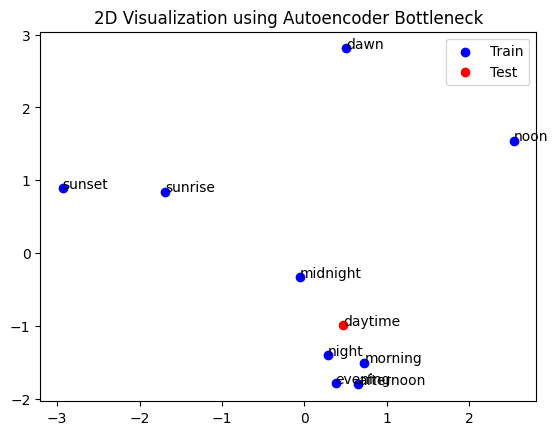

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# ----------------------------
# 1. Word lists and embeddings
# ----------------------------
train_words = [
    "midnight", "dawn", "sunrise", "morning", "noon",
    "afternoon", "evening", "sunset", "night"
]
test_words = ["daytime"]

all_words = train_words + test_words

train_matrix = np.array([wv[w] for w in train_words])
test_matrix  = np.array([wv[w] for w in test_words])

# Standardize
scaler = StandardScaler()
train_matrix = scaler.fit_transform(train_matrix)
test_matrix  = scaler.transform(test_matrix)

train_embeddings = torch.tensor(train_matrix, dtype=torch.float32)
test_embeddings  = torch.tensor(test_matrix, dtype=torch.float32)

# ----------------------------
# 2. Autoencoder definition
# ----------------------------
class Autoencoder(nn.Module):
    def __init__(self, d=300, k=2, h=64):
        super().__init__()
        self.enc = nn.Sequential(
            nn.Linear(d, k),
        )
        self.dec = nn.Sequential(
            nn.Linear(k, d),
        )

    def forward(self, x):
        z = self.enc(x)
        xhat = self.dec(z)
        return xhat, z

# ----------------------------
# 3. Training loop
# ----------------------------
model = Autoencoder()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.MSELoss()

for epoch in range(3000):
    model.train()
    optimizer.zero_grad()
    recon, z = model(train_embeddings)
    loss = criterion(recon, train_embeddings)
    loss.backward()
    optimizer.step()

# ----------------------------
# 4. Encode to 2D
# ----------------------------
model.eval()
with torch.no_grad():
    _, train_2d = model(train_embeddings)
    _, test_2d  = model(test_embeddings)
    train_2d = train_2d.numpy()
    test_2d  = test_2d.numpy()

# ----------------------------
# 5. Visualization
# ----------------------------
plt.scatter(train_2d[:, 0], train_2d[:, 1], color='blue', label='Train')
for i, w in enumerate(train_words):
    plt.annotate(w, (train_2d[i, 0], train_2d[i, 1]))

plt.scatter(test_2d[:, 0], test_2d[:, 1], color='red', label='Test')
for i, w in enumerate(test_words):
    plt.annotate(w, (test_2d[i, 0], test_2d[i, 1]))

plt.legend()
plt.title("2D Visualization using Autoencoder Bottleneck")
plt.show()
